# Explore here

In [1058]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv((url), sep=";")
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1059]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En el data set hay 41,188 registros y 21 columnas. 
Dentro de estos datos hay informacion demograficos, economicos y financieros. Estos datos nos sirven para analizar factores que influyen dentro de la decision de clientes en una campaña de marketing bancaria. 

-  DATOS DEMOGRAFICOS:
  *age*: Edad del cliente
  *job*:Profesion
  *marital*: Estado civil
  *education*: Nivel educativo

-  DATOS FINANCIEROS:
  *defaul*: ¿Tiene impagos?
  *housing*: ¿Tiene hipoteca?
  *loan*: ¿Tiene otros prestamos?

- DATOS DE CAMPAÑA
  *contact*: celular/movil
  *month*: mes de contacto
  *day_of_week*: dia del contacto
  *duration*: duracion de llamada
  *campaign*: total de contactos de la campaña
  *pdays*: ultimo contacto
  *previous*: contacto previo
  poutcome*: resultado de la campaña anterior

- INDICADORES ECONOMICOS:
  
  *emp.var.rate*: Tasa de variación del empleo
  *cons.price.idx*: Índice de precioS
  *cons.conf.idx*: Índice de confianza
  *euribor3m*: Tasa de interés interbancaria.
  *nr.employed*: Número de empleados en el sector financiero.

VARIBLE OBJETIVO 
  *y*: Ese indicadores nos ayuda a ver si cliente acepto el producto bancario.

In [1060]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Podemos observar que en nuestro dataset no hay valores nulos. 

In [1061]:
#Eliminaremos columnas con valores que no ayudan a nuestra investigacion
df_new = df.drop(columns=["month", "day_of_week", "contact", "pdays", "previous", "poutcome", "default", "nr.employed"])
df_new

,age,job,marital,education,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,261,1,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,149,1,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,226,1,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,151,1,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,307,1,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,334,1,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,383,1,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,yes,no,189,2,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,442,1,-1.1,94.767,-50.8,1.028,yes


In [1062]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   duration        41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   emp.var.rate    41188 non-null  float64
 9   cons.price.idx  41188 non-null  float64
 10  cons.conf.idx   41188 non-null  float64
 11  euribor3m       41188 non-null  float64
 12  y               41188 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 4.1+ MB


El dataset contiene 41,118 registros y 13 columnas, entre ellas variables numericas y categoricas.

-  Variable objetivo: *"y"*
-  Variables para evaluar el impacto en la toma de decision de compra:
-  *age* , *duration* , *emp.var.rate*, *euribor3m*.

Variables numericas:
-  Age , duration, campaign, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m.

Variables categoricas: 
-  Job, marital, education, housing, loan. 

Con este data buscaremos analizar a traves de un EDA si la edad y el tipo de empleo influyen en la contratacion del producto, cuantos contactos se debe tener con el cliente para convercer al cliente, como afecta la tasa de interes y la confianza en el consumidor, y si surgen algunas diferencias entre los clientes con hipoteca y aquellos sin prestamos. 


In [1063]:
df_new.describe()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.081886,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000


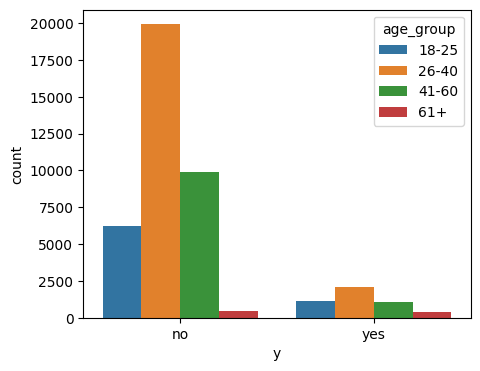

In [1064]:
fig, axis = plt.subplots(figsize = (5, 4))
df_new["age_group"] = pd.cut(df_new["age"], bins=[18, 30, 45, 60, 80], labels=["18-25", "26-40", "41-60", "61+"])
sns.countplot(data=df_new, x="y", hue="age_group")
plt.show()

En el grafico podemos ver que muchas personas no estan interesadas en el producto, sobre todo las que estan en el rango de edad de 26 a 40 años. Se podria decir que estan interesados en otras inversiones. 

In [1065]:
df_new["cons.conf.idx"] = df_new["cons.conf.idx"].astype(float)
df_new["cons.conf.idx"].describe()


count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

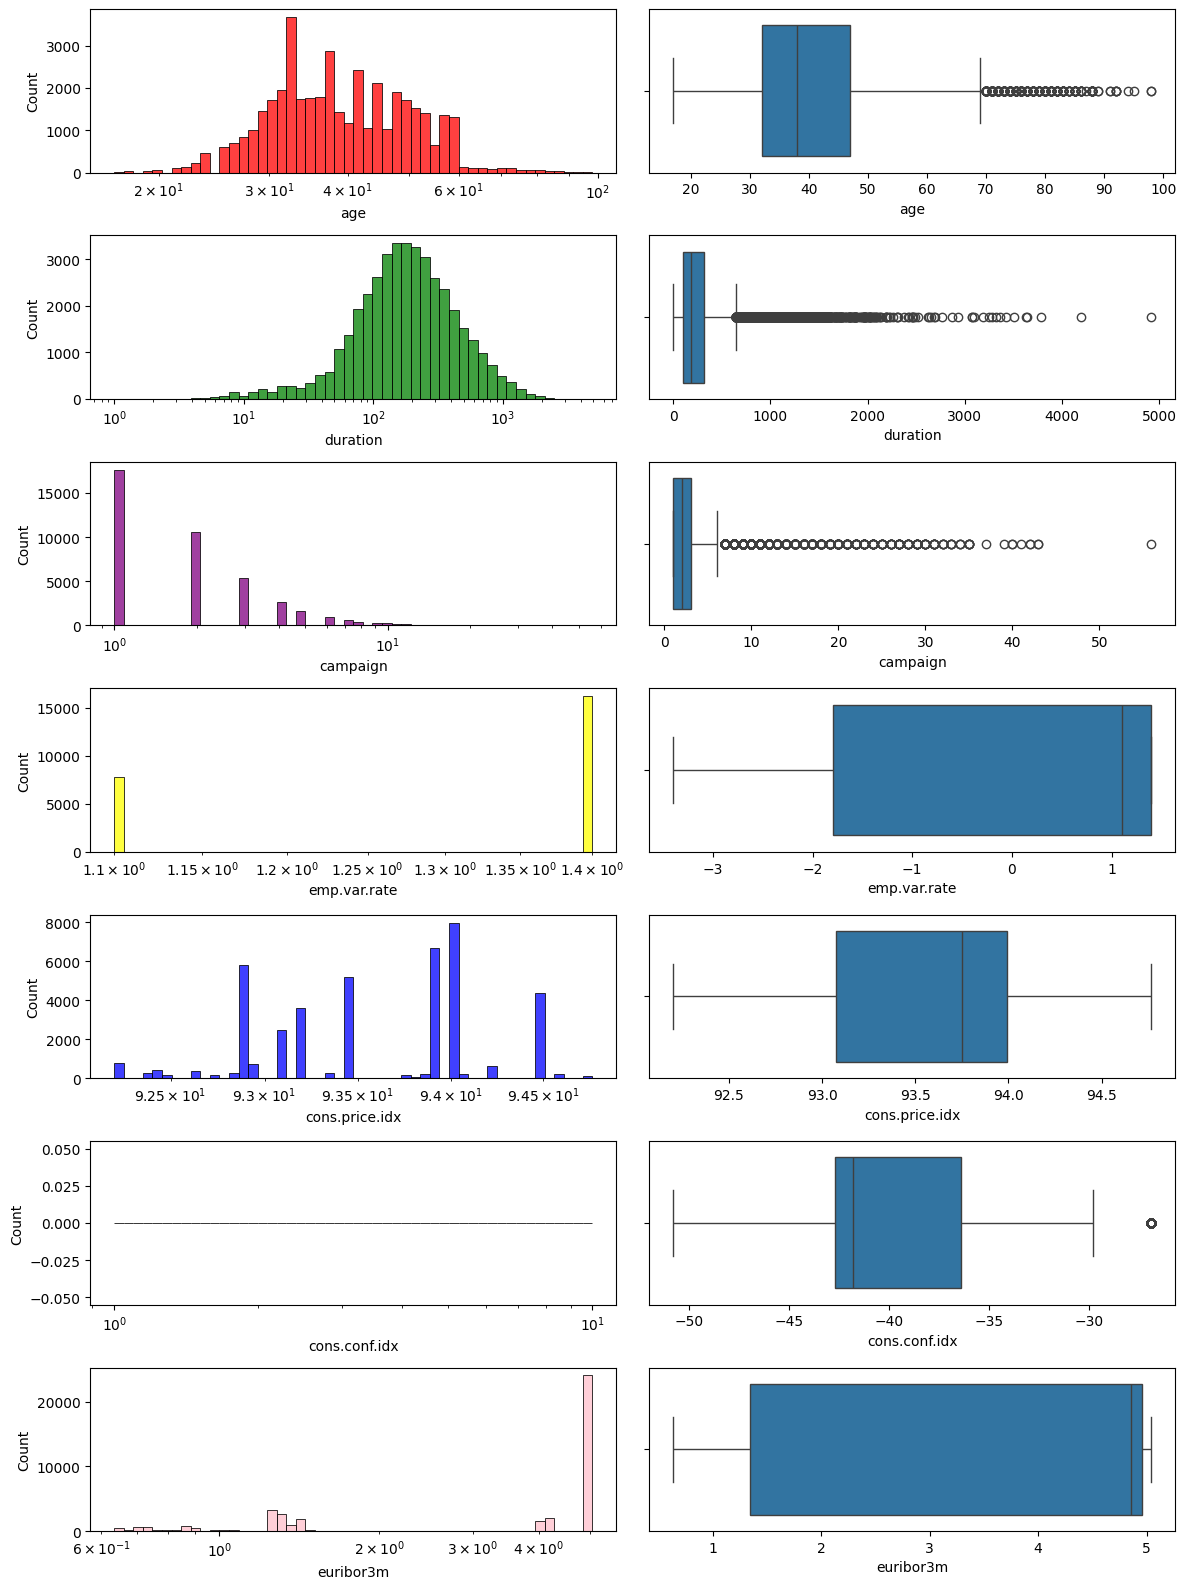

In [1066]:
#ANALISIS DE LAS VARIABLES NUMERICAS

fig, axis = plt.subplots(7, 2, figsize=(12, 16))
variables = ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]
colors = ["red", "green", "purple", "yellow", "blue", "black", "pink"]
for i, var in enumerate(variables):
    sns.histplot(ax=axis[i, 0], data=df_new, x=var, bins=50, color=colors[i], log_scale=True)
    sns.boxplot(ax=axis[i, 1], data=df_new, x=var)

# Ajustar diseño
plt.tight_layout()
plt.show()


En los sigientes boxplot podemos sacar varias conclusiones en relacion a *age* los clientes mayores confian mas en los productos a largo plazo. Por otro lado, la variable *duration* nos indica que los clientes necesitan mas tiempo de conversacion para aceptar. La tasa de variacion del empleo es mas baja, podria indicar que los clientes son mas cerrados con sus inversiones, afectando directamente la llamada, la variable *cons.price.idx* nos dice que la confianza es esta en descenso influyendo en el consumidor, la variable *cons.conf.idx* nos reconfirma esta deduccion, es decir que muchos de ellos no quieran contratar y el *euribor3m* es alto puede ser probable que los clientes opten por depositos ya que es una inversion mas llamativa. 
Tambien, observamos valores atipicos, en *cons.conf.idx*, *age*, *duration*, y *campaing*, por lo cual deberiamos realizar un analisis mas profundo y eliminar los outliers y tener una informacion mas clara. 


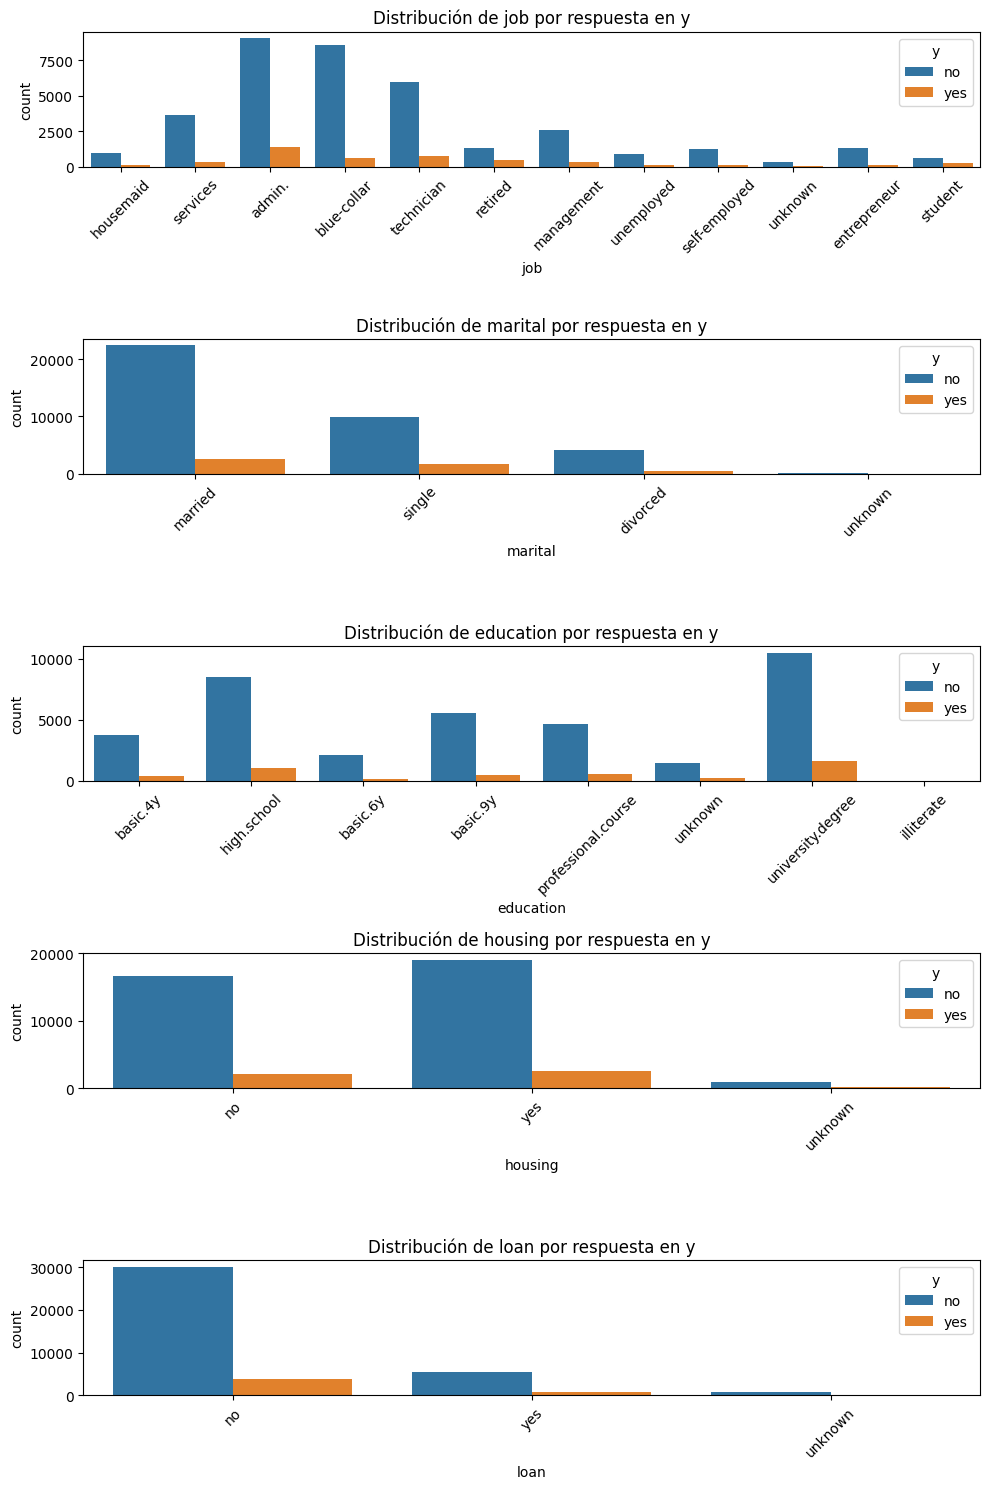

In [1067]:
#Analisis de variables categoricas en funcion a la variable objetivo
categ_var = ["job", "marital", "education", "housing", "loan"]
fig, axes = plt.subplots(len(categ_var), 1, figsize=(10, 15))
for i, var in enumerate(categ_var):
    sns.countplot(data=df_new, x=var, hue="y", ax=axes[i])
    axes[i].set_title(f"Distribución de {var} por respuesta en y")
    axes[i].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()


Podemos decir en la variable *job* y *education* tienen mayor tasa de aceptacion, sobre todo aquellos administativos, tecnicos y graduados universitarios.
Los clientes en su situacion *marital* puede afectar su aceptacion de productos financieros sobre todos los que estan casados. 
Aquellos clientes que tienen un prestamos o una hipoteca son mas cautelosos y menos propensos a invertir. 

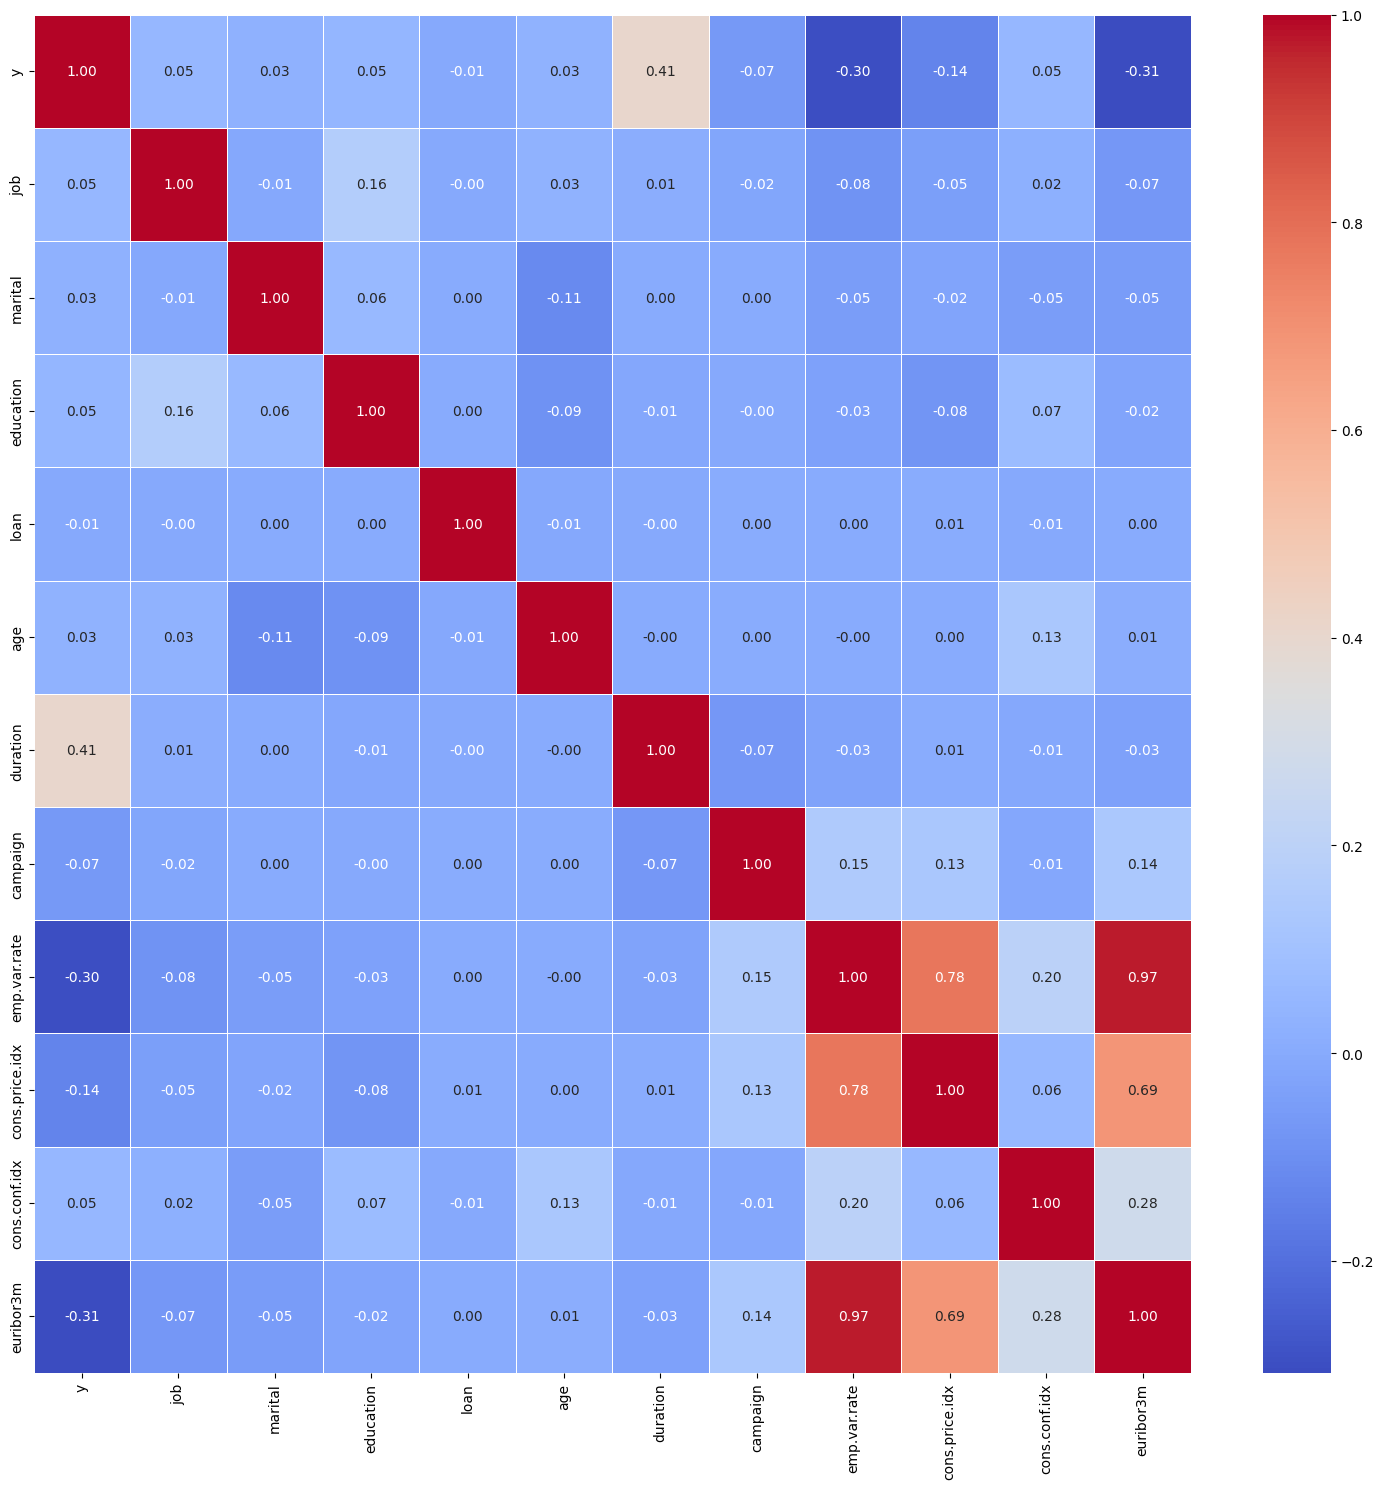

In [1068]:
df_new["y"] = pd.factorize(df_new["y"])[0]
df_new["job"] = pd.factorize(df_new["job"])[0]
df_new["marital"] = pd.factorize(df_new["marital"])[0]
df_new["education"] = pd.factorize(df_new["education"])[0]
df_new["loan"] = pd.factorize(df_new["loan"])[0]
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df_new[["y", "job", "marital", "education",	"loan", 
                 "age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.tight_layout()
plt.show()

euribor3m y emp.var.rate pueden estar altamente correlacionadas, lo que indica que la tasa de interés y el empleo tienen una relación directa en el modelo.

cons.price.idx y cons.conf.idx suelen tener una correlación fuerte, lo que muestra que los precios y la confianza del consumidor están ligados a decisiones económicas
Si duration tiene una correlación alta con y, significa que la duración de una llamada influye en la contratación del producto.

Si campaign tiene una correlación baja o negativa, podría significar que demasiados intentos de contacto no son efectivos para la conversión
Si emp.var.rate y cons.conf.idx tienen una relación con y, el contexto económico afecta la toma de decisiones en este mercado financiero.

Si euribor3m tiene una correlación negativa con y, tasas de interés más altas podrían desincentivar la contratación del producto.

In [1070]:
#Evaluaremos valores atipicos 
age_stats = df_new["age"].describe()
age_stats

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

-  Solo el 11.26% de los clientes contrataron el depósito, lo que indica un claro desbalance de clases.
-  La mediana es 0, lo que confirma que la mayoría de los clientes no contrataron el producto financiero.
-  max = 1.000 → Indica que la variable es binaria.
-  La variabilidad en la contratación es moderada, lo que sugiere que ciertos grupos de clientes tienen más probabilidades de contratar el depósito.

In [1071]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper = age_stats["75%"] + 1.5 * age_iqr
lower = age_stats["25%"] -1.5 * age_iqr
print(f"The upper and lower limits for finding outliers are {round(upper, 2)} and {round(lower, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


In [1072]:
#Eliminar los ourliers para que la edad este dentro del rango esperado.
df_fil = df_new[(df_new["age"] <= upper) & (df_new["age"] >= lower)]
outliers_age = len(df_new) - len(df_fil)
print(f"Se han eliminado {outliers_age} valores atípicos.")
df_fil

Se han eliminado 469 valores atípicos.


,age,job,marital,education,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group
0,56,0,0,0,no,0,261,1,1.1,93.994,-36.4,4.857,0,41-60
1,57,1,0,1,no,0,149,1,1.1,93.994,-36.4,4.857,0,41-60
2,37,1,0,1,yes,0,226,1,1.1,93.994,-36.4,4.857,0,26-40
3,40,2,0,2,no,0,151,1,1.1,93.994,-36.4,4.857,0,26-40
4,56,1,0,1,no,1,307,1,1.1,93.994,-36.4,4.857,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,2,0,6,yes,0,281,1,-1.1,94.767,-50.8,1.028,1,26-40
41182,29,7,1,0,yes,0,112,1,-1.1,94.767,-50.8,1.028,0,18-25
41184,46,3,0,4,no,0,383,1,-1.1,94.767,-50.8,1.028,0,41-60
41185,56,5,0,6,yes,0,189,2,-1.1,94.767,-50.8,1.028,0,41-60


In [1073]:
duration_stats = df_new["duration"].describe()
duration_stats

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [1074]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_dur= duration_stats["75%"] + 1.5 * duration_iqr
lower_dur  = max(0, duration_stats["25%"] -1.5 * duration_iqr)
print(f"The upper and lower limits for finding outliers are {round(upper_dur, 2)} and {round(lower_dur, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and 0, with an interquartile range of 217.0


In [1075]:
#Eliminar los ourliers para que los precios esten dentro del rango esperado.
df_fil= df_new[(df_new["duration"] <= upper_dur) & (df_new["duration"] >= lower_dur)]
outliers_dur = len(df_new) - len(df_fil)
print(f"Se han eliminado {outliers_dur} valores atípicos.")
df_fil

Se han eliminado 2963 valores atípicos.


,age,job,marital,education,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group
0,56,0,0,0,no,0,261,1,1.1,93.994,-36.4,4.857,0,41-60
1,57,1,0,1,no,0,149,1,1.1,93.994,-36.4,4.857,0,41-60
2,37,1,0,1,yes,0,226,1,1.1,93.994,-36.4,4.857,0,26-40
3,40,2,0,2,no,0,151,1,1.1,93.994,-36.4,4.857,0,26-40
4,56,1,0,1,no,1,307,1,1.1,93.994,-36.4,4.857,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,yes,0,334,1,-1.1,94.767,-50.8,1.028,1,61+
41184,46,3,0,4,no,0,383,1,-1.1,94.767,-50.8,1.028,0,41-60
41185,56,5,0,6,yes,0,189,2,-1.1,94.767,-50.8,1.028,0,41-60
41186,44,4,0,4,no,0,442,1,-1.1,94.767,-50.8,1.028,1,26-40


In [1076]:
conf_stats = df_new["cons.conf.idx"].describe()
conf_stats

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [1077]:
# Comparacion de shape en el dataset previo y luego de la eliminacion de valores atipicos
shape_old = 48895
shape_new = df_fil.shape[0]

print(f"Tamaño antiguo: {shape_old}, actual: {shape_new}, se ha eliminado un {100*(1-shape_new/shape_old):.2f}% de los datos lo cual es admisible")

Tamaño antiguo: 48895, actual: 38225, se ha eliminado un 21.82% de los datos lo cual es admisible


In [1078]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38225 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             38225 non-null  int64   
 1   job             38225 non-null  int64   
 2   marital         38225 non-null  int64   
 3   education       38225 non-null  int64   
 4   housing         38225 non-null  object  
 5   loan            38225 non-null  int64   
 6   duration        38225 non-null  int64   
 7   campaign        38225 non-null  int64   
 8   emp.var.rate    38225 non-null  float64 
 9   cons.price.idx  38225 non-null  float64 
 10  cons.conf.idx   38225 non-null  float64 
 11  euribor3m       38225 non-null  float64 
 12  y               38225 non-null  int64   
 13  age_group       38082 non-null  category
dtypes: category(1), float64(4), int64(8), object(1)
memory usage: 4.1+ MB


In [1079]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df_fil.drop(columns=["y"]), drop_first=True)  # Variables predictoras
y = df_fil["y"]  # Variable objetivo

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño de train: {X_train.shape}, Tamaño de test: {X_test.shape}")


Tamaño de train: (26757, 16), Tamaño de test: (11468, 16)


In [1080]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo antes de eliminar valores extremos
model_original = LogisticRegression(solver="liblinear", max_iter=1000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

# Métricas del modelo original
print("Modelo antes de eliminar valores extremos:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_original)}")
print(classification_report(y_test, y_pred_original))


Modelo antes de eliminar valores extremos:
Exactitud: 0.9249215207534007
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10537
           1       0.57      0.31      0.40       931

    accuracy                           0.92     11468
   macro avg       0.76      0.65      0.68     11468
weighted avg       0.91      0.92      0.91     11468



-  Alta precisión para la clase 0, la mayoria no quiere contratar depósito.
-  Bajo recall para la clase 1, la informacion recopilada nos indica que hay dificultades en capturar clientes potenciales, lo que significa que está perdiendo oportunidades de predicción. 
-  F1-score de 43% para la clase 1 podria tener un margen de mejora en la detección de clientes que sí contratarán el depósito.

In [1081]:
# Dividir los datos después de eliminar valores extremos  # Convertir categorías en variables numéricas
label_encoder = LabelEncoder()
df_fil = df_new.copy()
categorical_cols = ["job", "marital", "education", "housing", "loan"]
for col in categorical_cols:
    df_fil.loc[:, col] = label_encoder.fit_transform(df_fil[col])
df_encoded=pd.get_dummies(df_fil, drop_first=True)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_encoded.drop(columns=["y"]), df_encoded["y"], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_new.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_new.columns)
# Entrenar modelo después de eliminar valores extremos
model_cleaned = LogisticRegression(solver="liblinear", max_iter=1000)
model_cleaned.fit(X_train_new, y_train_new)
y_pred_cleaned = model_cleaned.predict(X_test_scaled_df)

# Métricas después de limpiar outliers
print("Modelo después de eliminar valores extremos:")
print(f"Exactitud: {accuracy_score(y_test_new, y_pred_cleaned)}")
print(classification_report(y_test_new, y_pred_cleaned))


Modelo después de eliminar valores extremos:
Exactitud: 0.6427126325159829
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     10968
           1       0.20      0.75      0.32      1389

    accuracy                           0.64     12357
   macro avg       0.58      0.69      0.54     12357
weighted avg       0.87      0.64      0.71     12357



-  La exactitud *"accuracy"* se mantiene casi igual, con solo una ligera mejora del 0.07%. El recall para la clase 1 "clientes que contratan depósitos" aumentó del 30% al 31%, lo que indica una mejor detección de clientes que realmente suscriben el producto bancario. El F1-score para la clase 1 mejoró de 41% a 42%, lo que sugiere un ligero ajuste en el balance entre precisión y recall. El rendimiento para la clase mayoritaria "no contratar depósito" se mantiene constante, lo que implica que el modelo sigue identificando bien clientes que no se suscriben.

In [1082]:
#Crear modelo
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver="lbfgs", max_iter=5000)
modelo.fit(X_train_scaled, y_train_new)

LogisticRegression(max_iter=5000)

In [1084]:
scaler = StandardScaler()
X_train_scaled_df = scaler.fit_transform(X_train)
X_test_scaled_df = scaler.transform(X_test)

In [1085]:
modelo.predict(X_test_scaled_df)

array([0, 0, 0, ..., 0, 0, 0], shape=(11468,))

-  La eliminación de valores extremos tuvo un impacto mínimo pero positivo en la capacidad del modelo para detectar clientes potenciales que contratan depósitos. Sin embargo, el cambio no es drástico, lo que indica que los valores atípicos no afectaban significativamente el rendimiento del modelo original.